<a href="https://colab.research.google.com/github/Code-RED-LionKing/Likelion-Jejubase/blob/main/EDA_0530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(Exploratory Data Anaysis) 탐색적 데이터 분석

- 탐색적 자료 분석
- 데이터 분석 이전에 그래프나 통계적인 분석을 통해서 데이터를 직관적으로 이해
- 데이터 자체가 가지고 있는 그대로의 의미를 파악
- 목적
 - 데이터 수집 의사 결정
 - 데이터 맞는 모델 선정
 - 변수들 간 관계 파악

- 순서
 - 데이터 가져오기(모듈 세팅)
 - 데이터 정보 확인
 - 데이터 전처리
  - 결측치
  - 이상치
 - 데이터 시각화

## 1. 데이터 가져오기 (모듈 세팅)

In [ ]:
import pandas as pd

In [ ]:
out_df = pd.read_excel('outlier.xlsx')

In [ ]:
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


## 2. 데이터 정보 확인

In [ ]:
out_df.head()

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29


In [ ]:
out_df.tail()

,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [ ]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [ ]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [ ]:
out_df = out_df.set_index('번호')

In [ ]:
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


In [ ]:
out_df['국어'] = out_df['국어'].replace(-57, 57)

In [ ]:
out_df # 범주를 알고 있음 (0~100)

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


### 이상치 확인하기

- 이상치(outlier): 사분위에서 특정 범위(+-IQR * 1.5)를 초과하는 경우

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 이상치 확인 -> boxplot

plt.boxplot(out_df)
plt.show()

NameError: ignored

In [ ]:
out_df['국어'] = out_df['국어'].replace(810, 81)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


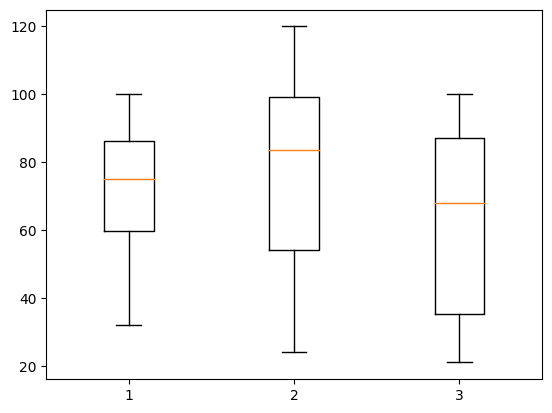

In [ ]:
plt.boxplot(out_df)
plt.show()

## 1. 데이터 불러오기

In [ ]:
weather_df = pd.read_csv('weather.csv', encoding='cp949')

In [ ]:
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [ ]:
weather_df.tail()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3
364,2010.12.31,-4.4,-1.0,15.0,19.2,6.3,284.1


## 2. 데이터 정보 확인

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [ ]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [ ]:
weather_df = weather_df.set_index('일시')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3


In [ ]:
# pd.to_datetime
weather_df.index = pd.to_datetime(weather_df.index, format='%Y-%m-%d')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           359 non-null    float64
 1   최고기온(°C)           359 non-null    float64
 2   일강수량(mm)           359 non-null    float64
 3   최대 순간 풍속(m/s)      359 non-null    float64
 4   평균 풍속(m/s)         357 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [ ]:
weather_df.info()